참고 URL : 
* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)

* 캐글을 시작한지 두 달정도 된 초보자로, 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.


# 캐글러를 대상으로 한 설문조사
* 설문기간 : 2017년 8월 7일부터 8월 25일까지
* 평균 응답 시간은 16.4 분
* 171 개 국가 및 지역에서 16,716 명의 응답자
* 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
* 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
* 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
* 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
* 질문은 선택적
* 모든 질문이 모든 응답자에게 보여지는 것은 아님 
* 취업을 한 사람과 학생을 나누어 다른 질문을 함
* 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
* 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


# 데이터 파일
5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [4]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv', 
                  encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


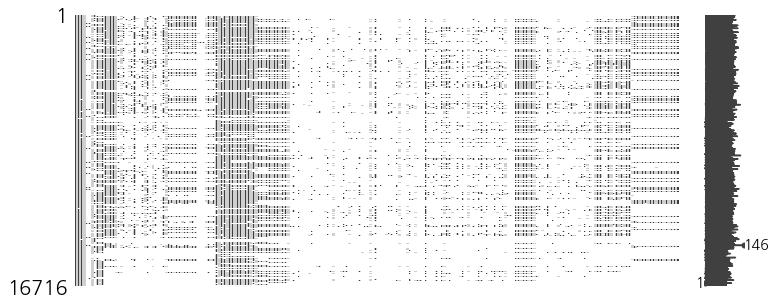

In [7]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

* 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

# 설문통계

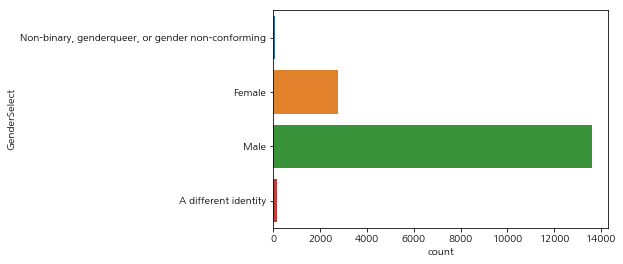

In [8]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

여성보다는 남성의 비율이 훨씬 높은 편이다.

In [9]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [10]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

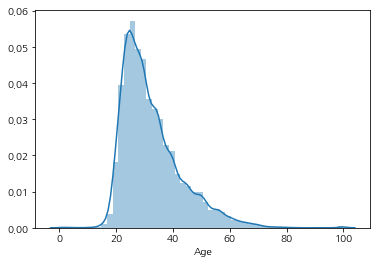

In [11]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 어리며, 
20대부터 급격히 늘어나며, 30대가 가장 많다. 
평균 나이는 32세다.

## 학력

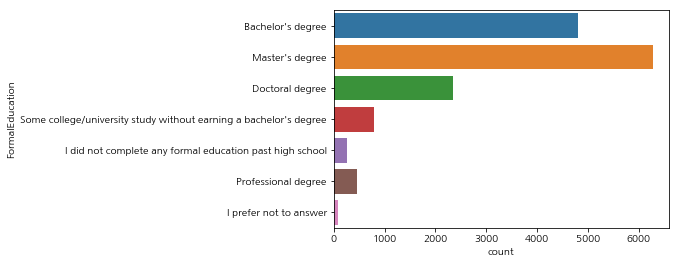

In [12]:
sns.countplot(y='FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 사람들도 많다.

## 전공

In [13]:
# value_counts 를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다. 
# normalize=True 옵션을 사용하면, 
# 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순이다.

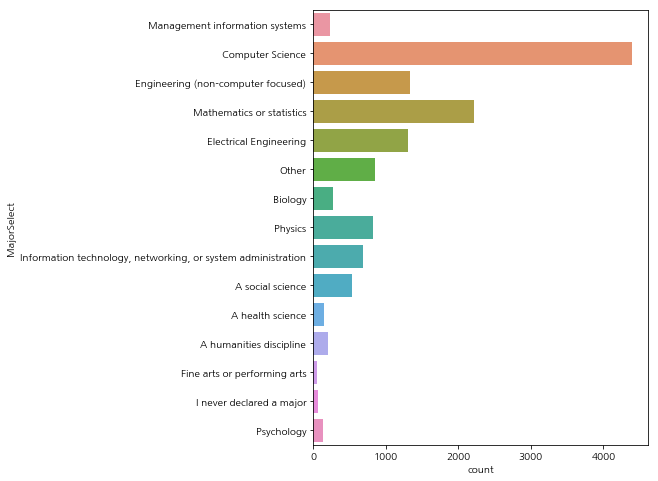

In [14]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

## 취업 여부

In [15]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


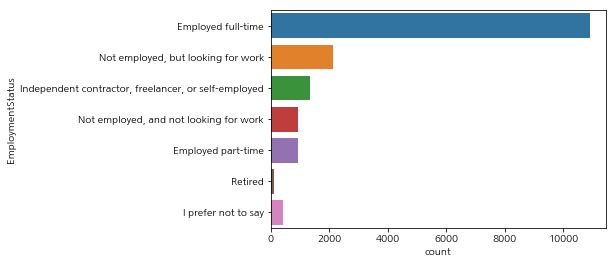

In [16]:
sns.countplot(y='EmploymentStatus', data=mcq)

응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%다.

## 프로그래밍 경험
* 'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

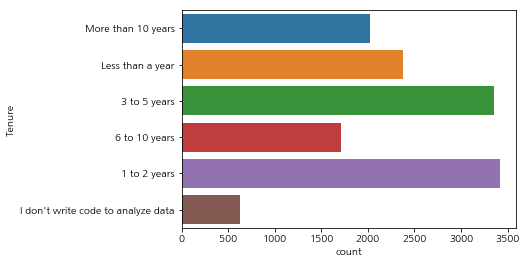

In [17]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


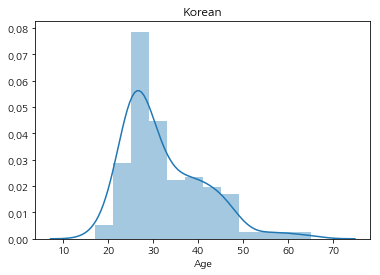

In [18]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [19]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5,1,'Korean')

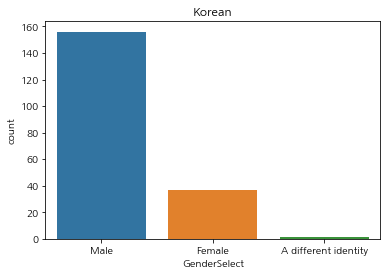

In [20]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5,1,'korean Male')

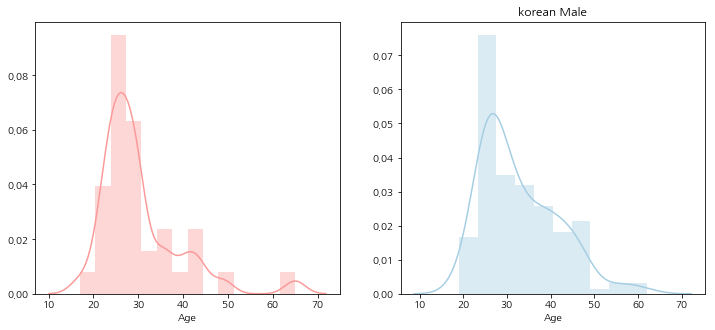

In [21]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

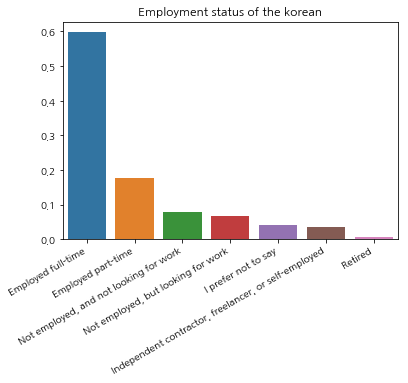

In [22]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()


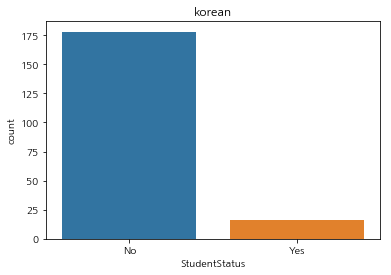

In [23]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [24]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## 자주 묻는 질문 FAQ
* 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

### Q1. Python과 R중 어떤 언어를 배워야 할까요?

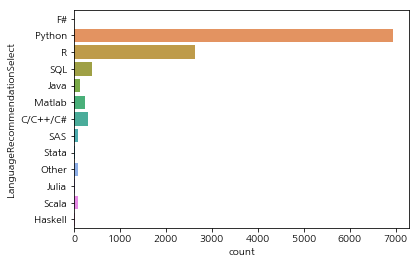

In [25]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

파이썬을 명확하게 선호하고 있는 것으로 보여지며, 전문가와 강사들이 선호하는 언어를 알아본다. 

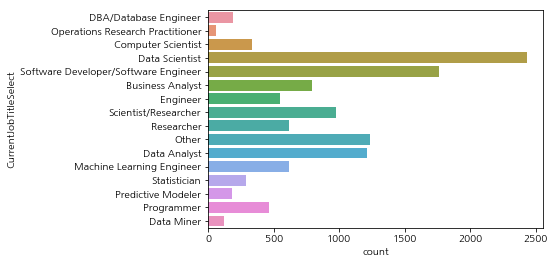

In [26]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [27]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


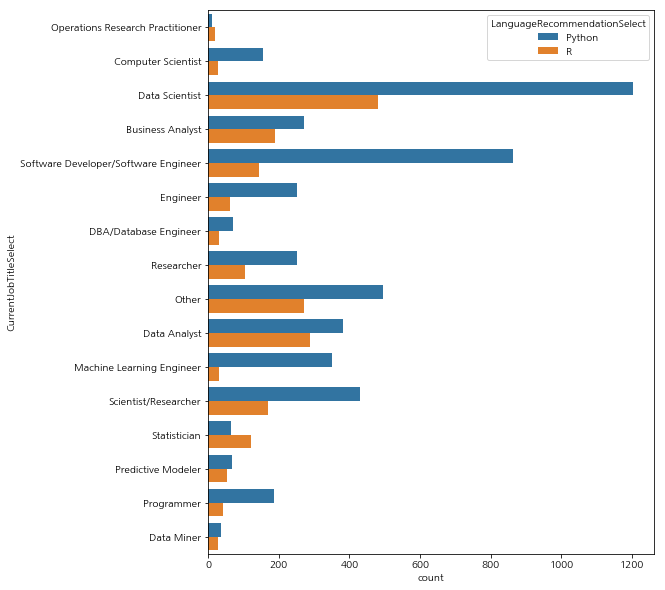

In [28]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
              hue='LanguageRecommendationSelect', 
              data=data)

데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계 학자들이다.

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
* 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

## 데이터사이언스 툴

In [29]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


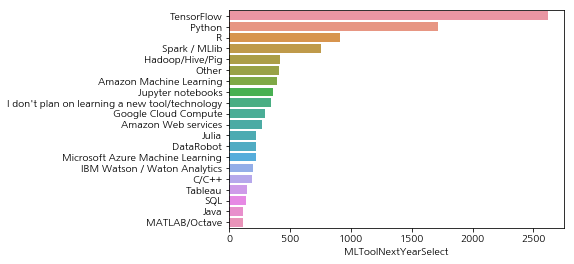

In [30]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했다.
그리고 Python이 15%, R은 8% 로 따르고 있다.

클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다.

### 다음 해에 주목할 만한 Data Science Methods

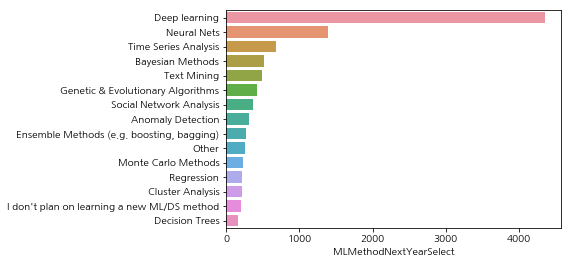

In [31]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 중간 쯤에 부스팅과 배깅 같은 앙상블 메소드도 있다. 

## Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [32]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

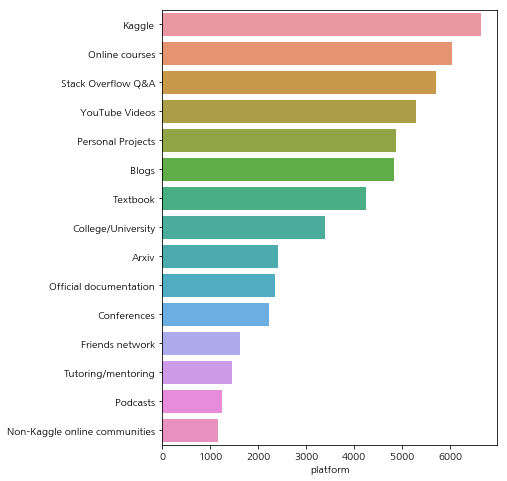

In [33]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

* Kaggle은 우리 응답자들 사이에서 가장 인기있는 학습 플랫폼 
* 그러나 이 설문 조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음 
* 온라인 코스, 스택 오버플로 및 유튜브 (YouTube) 상위 5 대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다.

In [34]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [35]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

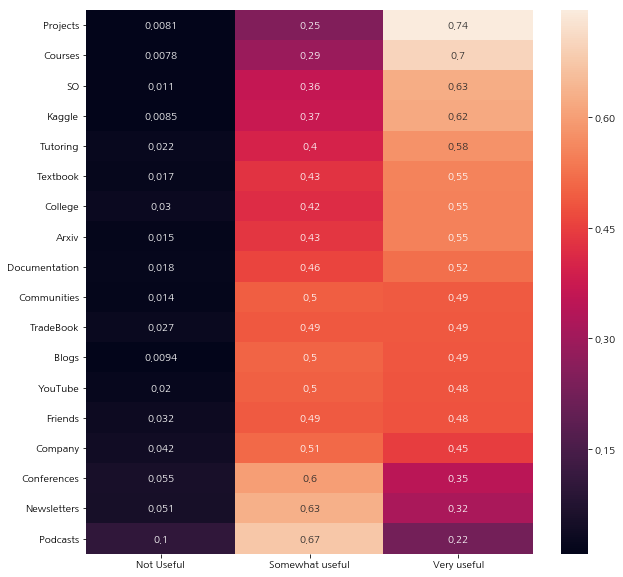

In [36]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

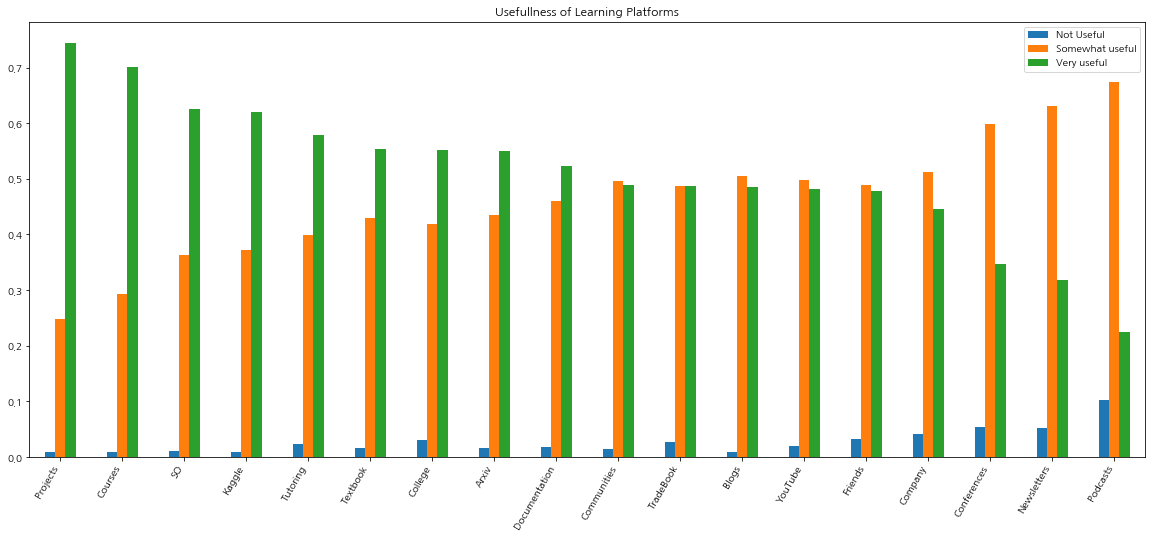

In [37]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

실제로 프로젝트를 해보는 것에 대해 74.7%의 응답자가 응답했고 매우 유용하다고 표시했다. SO는 스택오버플로우가 아닐까 싶고, 캐글, 수업, 책이 도움이 많이되는 편이다. 팟캐스트는 매우 유용하지 않지만 때때로 유용하다는 응답은 가장 많았다.

In [38]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [39]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

Kaggle            5.531434
OnlineCourses    27.375514
Other             1.795940
SelftTaught      33.366771
University       16.988607
Work             15.217593
dtype: float64

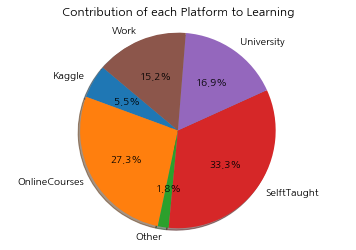

In [40]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답되었다.

## Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?


In [41]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [42]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [43]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [44]:
s = s[s != 'nan']

In [45]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장많고, 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음이고 적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음이다.

## Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?

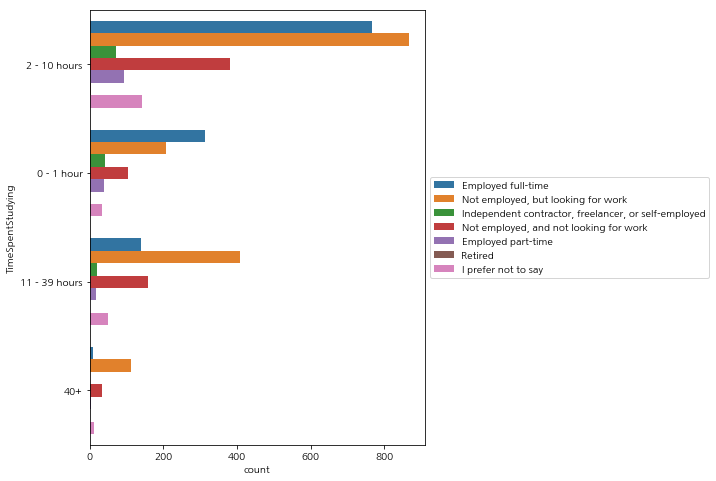

In [46]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

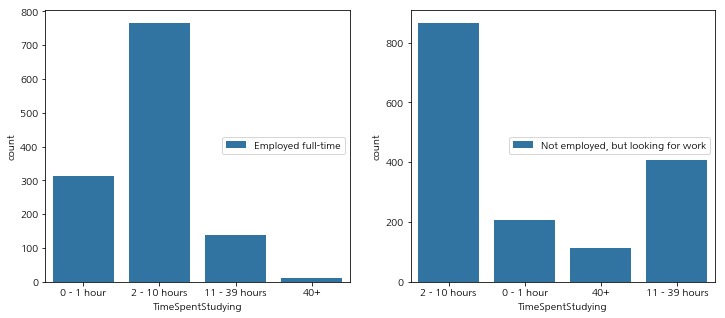

In [47]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

## Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [48]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [49]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [50]:
s = s[s != 'nan'].value_counts().head(20)

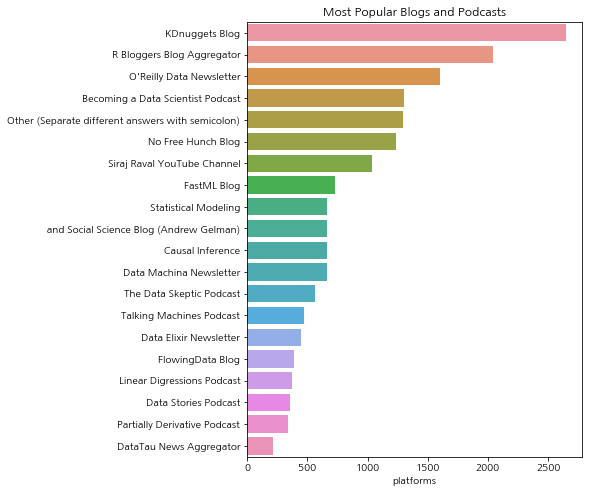

In [51]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter 가 가장 유용하다고 투표를 받았다.
데이터 사이언스 되기라는 팟캐스트도 유명한 듯 하다.

* [Machine Learning, Data Science, Big Data, Analytics](https://www.kdnuggets.com/)

* [Becoming a Data Scientist - YouTube - YouTube](https://www.youtube.com/channel/UCfxnrdBM1YRV9j2MB8aiy4Q)

* [Siraj Raval - YouTube - YouTube](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A)


In [52]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [53]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [54]:
t = t[t != 'nan'].value_counts()

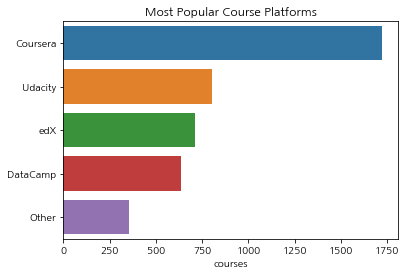

In [55]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

Coursera와 Udacity가 가장 인기있는 플랫폼이다.

## Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [56]:
job_features = [
    x for x in mcq.columns if x.find(
        'JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [57]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [58]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
EnterpriseTools,0.144829,0.564970,0.290200
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
Stats,0.513889,0.457576,0.028535
Visualizations,0.455392,0.490820,0.053788


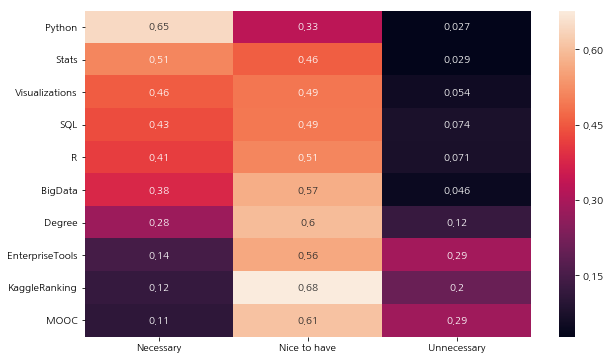

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", 
                            ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

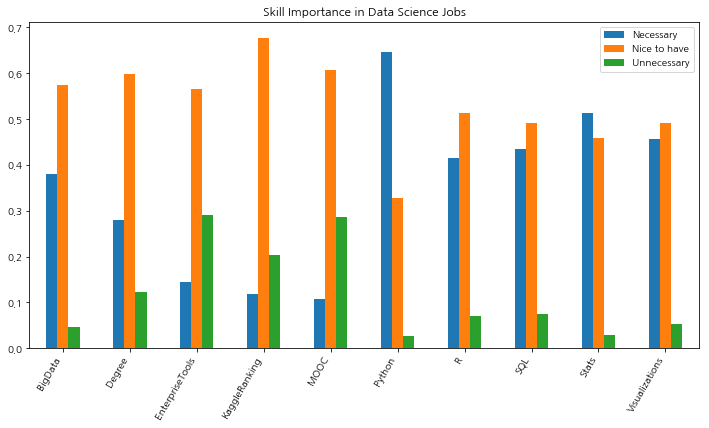

In [60]:
jdf.plot(kind='bar', figsize=(12,6), 
         title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

꼭 필요한 것으로 Python, R, SQL, 통계, 시각화가 있다.

있으면 좋은 것은 빅데이터, 학위, 툴 사용법, 캐글랭킹, 무크가 있다.

## Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [61]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [62]:
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('data/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[
    ['CompensationAmount','CompensationCurrency',
     'GenderSelect',
     'Country',
     'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [63]:
print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


가장 큰 수치는 여러 국가들의 GDP보다 크다고 한다. 가짜 응답이며, 평균급여는 USD $ 53,812 이다. 그래프를 좀 더 잘 표현하기 위해 50만불 이상의 데이터만 distplot으로 그려봤다.

Text(0.5,1,'Salary Distribution')

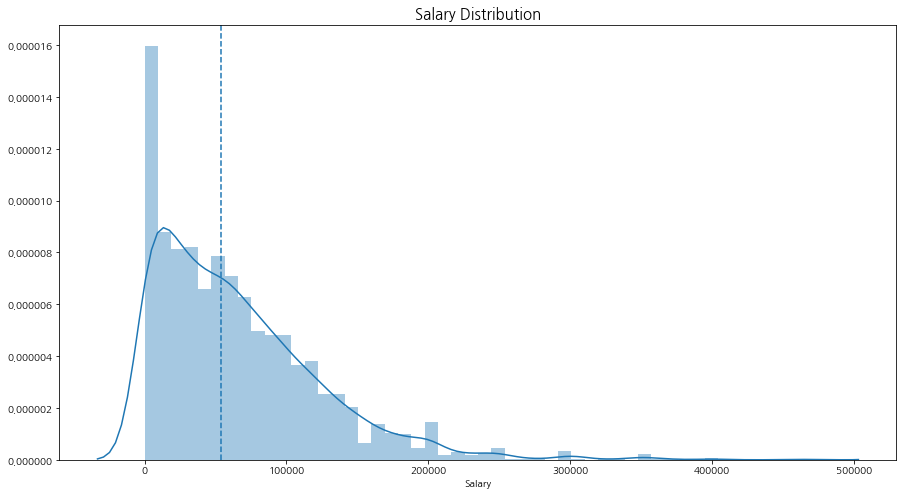

In [64]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

Text(0.5,1,'Highest Salary Paying Countries')

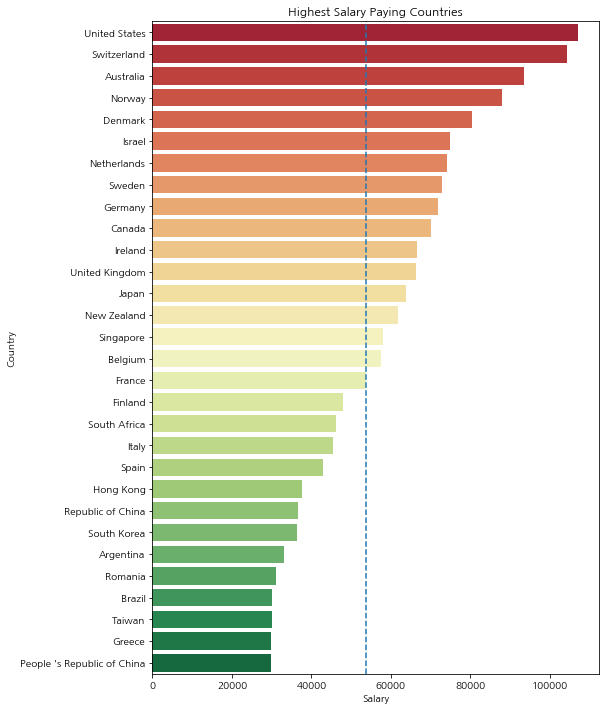

In [65]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', 
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

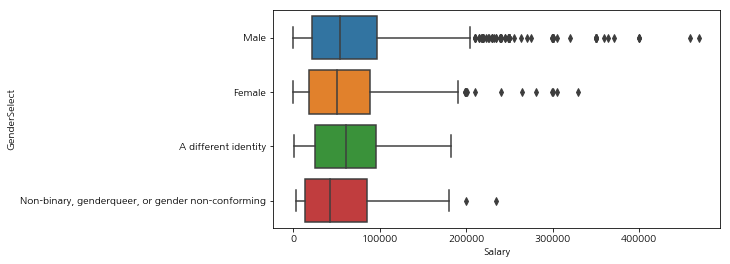

In [66]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

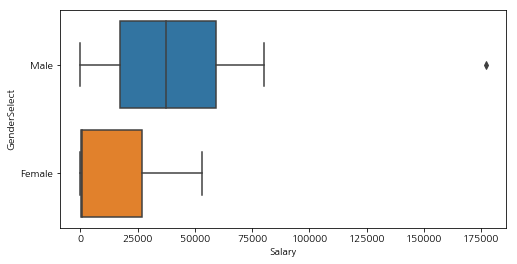

In [67]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [68]:
salary_korea.shape

(26, 8)

In [69]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [70]:
salary_korea_male = salary_korea[
    salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [71]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


## Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [72]:
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
    )

In [73]:
q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [74]:
q = q[q != 'nan'].value_counts()

In [75]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


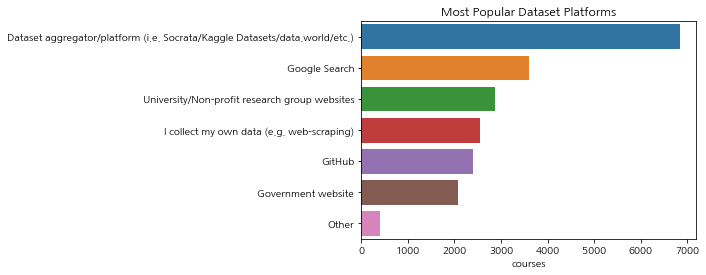

In [76]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

Kaggle 및 Socrata는 개인 프로젝트나 학습에 사용하기 위한 데이터를 얻는데 인기있는 플랫폼이다. Google 검색 및 대학 / 비영리 단체 웹 사이트는 각각 2위와 3위에 있다. 그리고 직접 웹스크래핑 등을 통해 데이터를 수집한다고 한 응답이 4위다.

In [77]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('data/freeformResponses.csv', 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [78]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

#### 개인프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점은 무엇일까?

In [79]:
ppcff = ff[
    'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning,20
Cleaning the data,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
Size,9
-,9


대부분 데이터를 정제하는일이라고 응답하였고 그 다음이 데이터 크기다.

## Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [80]:
time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

FindingInsights    13.094776
GatheringData      36.144754
ModelBuilding      21.268066
OtherSelect         2.396247
Production         10.806372
Visualizing        13.869372
dtype: float64



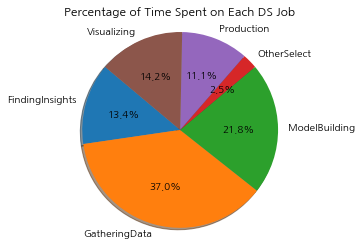

In [81]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

데이터를 수집하는 일이 37%로 업무의 가장 큰 비중을 차지하고 그 다음으로 모델을 구축하고 시각화, 인사이트를 찾는 순이다.

## Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

In [82]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [83]:
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

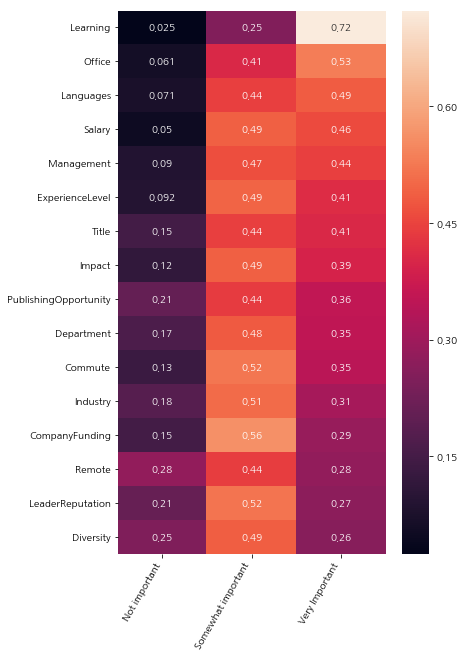

In [84]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

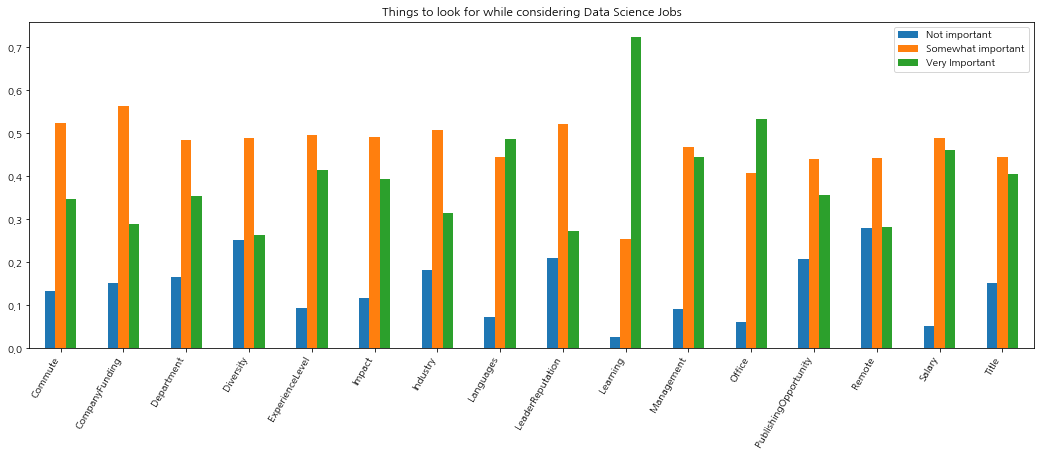

In [85]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

데이터 사이언티스트로 직업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크나 언어, 급여, 경영상태, 경력정도 순이다.

## Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요? 

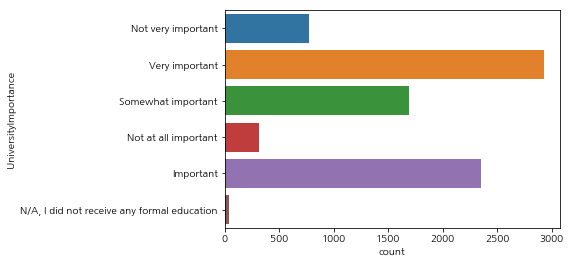

In [86]:
sns.countplot(y='UniversityImportance', data=mcq)

In [87]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

마치 연령대 그래프를 찍어 본것과 같은 형태의 그래프다.
20~30대는 대학 학위가 매우 중요하다고 생각하며, 연령대가 높은 응답자들은 그다지 중요하지 않다고 응답했다. 300명 미만의 응답자만이 학위가 중요하지 않다고 생각한다.


대부분의 응답자가 석사와 박사인 것을 고려해 봤을 때 이는 자연스러운 응답이다.

## Q13. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [88]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

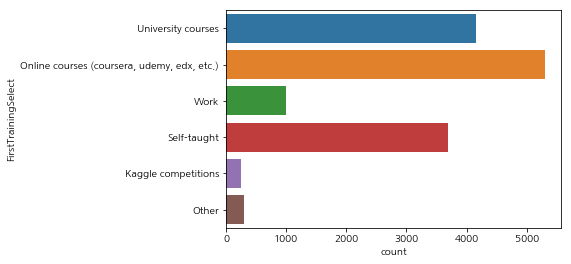

In [89]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

대부분의 응답자가 학사학위 이상으로 대학교육에 대한 중요성을 부여했지만,
가장 많은 응답자가 코세라, 유데미와 같은 온라인 코스를 통해 데이터 사이언스를 공부했고 그 다음으로 대학교육이 차지하고 있다.

개인프로젝트를 해보는 것도 중요하다고 답한 응답자가 제법 된다.

## Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

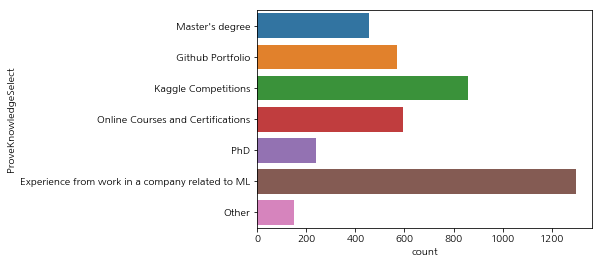

In [90]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

머신러닝과 관련 된 직무경험이 가장 중요하고 다음으로 캐글 경진대회의 결과가 중요하다고 답했다. 그리고 온라인 강좌의 수료증이나 깃헙 포트폴리오 순으로 중요하다고 답했다.

## Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

scikit과 같은 라이브러리는 세부 정보를 추상화하여 기본기술을 몰라도 ML 모델을 프로그래밍 할 수 있다. 그럼에도 그 안에 있는 수학을 아는 것이 중요할까?

In [91]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [92]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

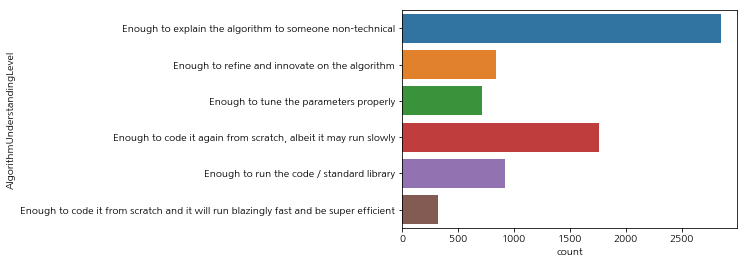

In [93]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다는 응답이 그 뒤를 잇는다.

##  Q16. 어디에서 일을 찾아야 할까요?

In [94]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


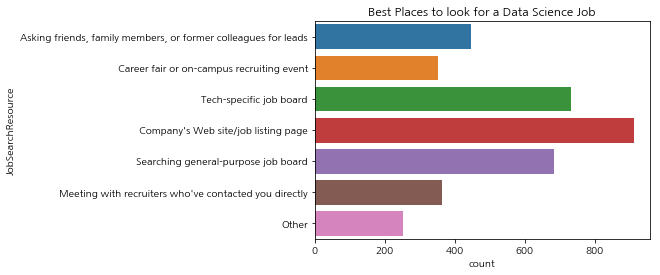

In [95]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

구직자들은 회사 웹사이트나 구직 사이트로부터 찾고 그 다음으로 특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용 정보를 얻는다.

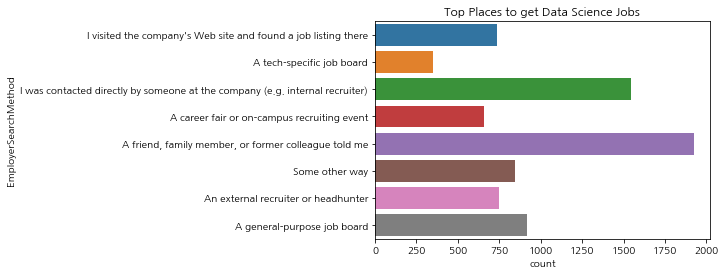

In [96]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

위에서 구직자는 주로 구직사이트로 부터 채용정보를 가장 많이 찾았으나,
채용자는 친구, 가족, 이전 직장 동료 등의 추천을 통해 가장 많이 사람을 구하며 다음으로 리쿠르터나 특정 회사에 소속 된 사람에게 직접 연락을 해서 구하는 비율이 높다.

### 그럼 한국 사람들은 어떨까?

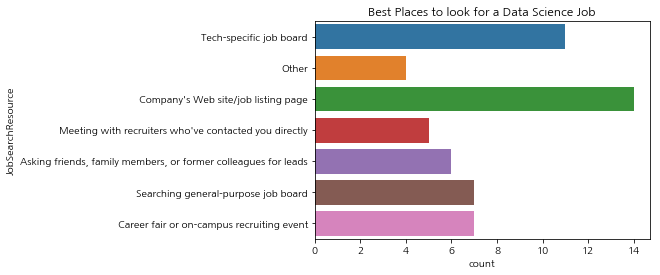

In [97]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

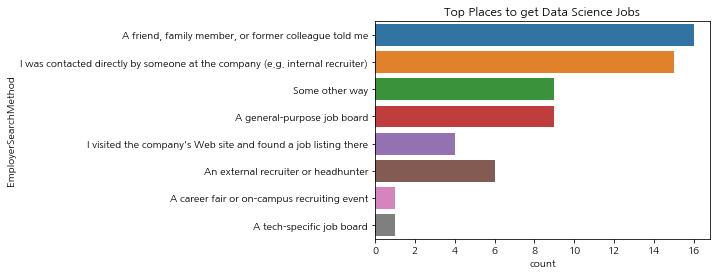

In [98]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)

## 결론
* 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 데이터 수집과 정제는 어려운 일이다.(공감)
* 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.